In [1]:
import render
import rooms.dataset
import evaluate
import torch
#import sounddevice as sd
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import metrics

/home/gzanin/.local/lib/python3.11/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
torch.set_default_dtype(torch.float32)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device  = "cpu"

In [3]:
D_0 = rooms.dataset.dataLoader("classroomBase")

In [4]:
L_0 = render.get_listener(source_xyz=D_0.speaker_xyz, listener_xyz = D_0.xyzs[0], surfaces=D_0.all_surfaces, 
                                                speed_of_sound=D_0.speed_of_sound,
                                                parallel_surface_pairs=D_0.parallel_surface_pairs,
                                                max_order=D_0.max_order, max_axial_order=D_0.max_axial_order )

Considered Paths:	59049
Total Considered Paths, after Axial:	59079
Valid Paths:	851


In [5]:
R_0 = render.Renderer(n_surfaces=len(D_0.all_surfaces))

In [6]:
pt_file = torch.load('./models/classroomBase/weights.pt', map_location=device)
R_0.energy_vector = nn.Parameter(pt_file['model_state_dict']['energy_vector'])
R_0.source_response = nn.Parameter(pt_file['model_state_dict']['source_response'])
R_0.directivity_sphere = nn.Parameter(pt_file['model_state_dict']['directivity_sphere'])
R_0.decay = nn.Parameter(pt_file['model_state_dict']['decay'])
R_0.RIR_residual = nn.Parameter(pt_file['model_state_dict']['RIR_residual'])
R_0.spline_values = nn.Parameter(pt_file['model_state_dict']['spline_values'])

R_0.bp_ord_cut_freqs.to(device)

Parameter containing:
tensor([  70.,  400.,  800., 1000., 1300., 2000.], requires_grad=True)

In [7]:
resp = R_0.render_early_with_learned_beampatterns(L_0)
resp

frequency response tensor([[4.5546e-02, 4.5546e-02, 6.2867e-01,  ..., 1.6183e-01, 1.6183e-01,
         1.6183e-01],
        [2.5605e-02, 2.5605e-02, 3.4855e-01,  ..., 2.6467e-02, 2.6467e-02,
         2.6467e-02],
        [1.2562e-02, 1.2562e-02, 3.8377e-01,  ..., 1.0689e-02, 1.0689e-02,
         1.0689e-02],
        ...,
        [5.4416e-08, 5.4416e-08, 2.2072e-05,  ..., 7.4562e-10, 7.4562e-10,
         7.4562e-10],
        [5.6889e-08, 5.6889e-08, 1.1741e-05,  ..., 1.3788e-10, 1.3788e-10,
         1.3788e-10],
        [1.6537e-08, 1.6537e-08, 1.1544e-05,  ..., 9.4752e-11, 9.4752e-11,
         9.4752e-11]], dtype=torch.float64, grad_fn=<MulBackward0>)
frequency response shape torch.Size([851, 6930])
path:  1 of 851


[{'angle': [0, -90.0],
  'f_response': tensor([ 0.0036+0.0000j, -0.0084-0.0125j, -0.0271-0.0009j,  ...,
           0.0210+0.0240j,  0.0280+0.0159j,  0.0319+0.0056j],
         grad_fn=<CopySlices>),
  't_response': tensor([-4.7866e-06, -4.7539e-06, -2.5393e-05,  ..., -2.0074e-18,
           5.5062e-19,  8.1095e-19], grad_fn=<MulBackward0>)},
 {'angle': [0.0, -30.0],
  'f_response': tensor([ 0.0036+0.0000j, -0.0084-0.0125j, -0.0271-0.0009j,  ...,
           0.0579+0.0662j,  0.0770+0.0437j,  0.0877+0.0153j],
         grad_fn=<CopySlices>),
  't_response': tensor([-1.4525e-05, -1.0936e-05, -6.7143e-05,  ..., -5.5795e-18,
           2.4707e-18, -2.4241e-18], grad_fn=<MulBackward0>)},
 {'angle': [60.0, -30.0],
  'f_response': tensor([ 0.0036+0.0000j, -0.0084-0.0125j, -0.0271-0.0009j,  ...,
           0.0098+0.0112j,  0.0130+0.0074j,  0.0148+0.0026j],
         grad_fn=<CopySlices>),
  't_response': tensor([-1.0548e-05, -1.4172e-05, -6.2088e-05,  ..., -1.6504e-19,
          -4.5561e-20, -9.002

In [8]:
len(resp)
resp[0]['t_response']

tensor([-4.7866e-06, -4.7539e-06, -2.5393e-05,  ..., -2.0074e-18,
         5.5062e-19,  8.1095e-19], grad_fn=<MulBackward0>)

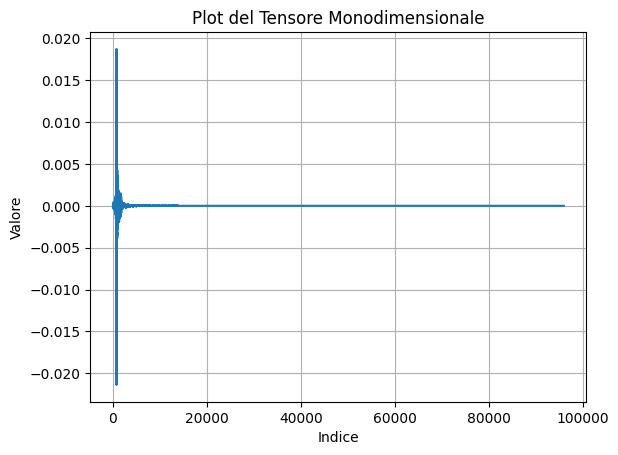

In [9]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp[5]['t_response'].detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()


In [10]:
resp = R_0.render_RIR_learned_beampattern(L_0)
resp

frequency response tensor([[4.5546e-02, 4.5546e-02, 6.2867e-01,  ..., 1.6183e-01, 1.6183e-01,
         1.6183e-01],
        [2.5605e-02, 2.5605e-02, 3.4855e-01,  ..., 2.6467e-02, 2.6467e-02,
         2.6467e-02],
        [1.2562e-02, 1.2562e-02, 3.8377e-01,  ..., 1.0689e-02, 1.0689e-02,
         1.0689e-02],
        ...,
        [5.4416e-08, 5.4416e-08, 2.2072e-05,  ..., 7.4562e-10, 7.4562e-10,
         7.4562e-10],
        [5.6889e-08, 5.6889e-08, 1.1741e-05,  ..., 1.3788e-10, 1.3788e-10,
         1.3788e-10],
        [1.6537e-08, 1.6537e-08, 1.1544e-05,  ..., 9.4752e-11, 9.4752e-11,
         9.4752e-11]], dtype=torch.float64, grad_fn=<MulBackward0>)
frequency response shape torch.Size([851, 6930])
path:  1 of 851


[{'angle': [0, -90.0],
  'f_response': tensor([ 0.0036+0.0000j, -0.0084-0.0125j, -0.0271-0.0009j,  ...,
           0.0210+0.0240j,  0.0280+0.0159j,  0.0319+0.0056j],
         grad_fn=<CopySlices>),
  't_response': tensor([-4.7866e-06, -4.4749e-06, -2.4833e-05,  ...,  4.9885e-07,
           4.5558e-07,  4.7935e-07], grad_fn=<AddBackward0>)},
 {'angle': [0.0, -30.0],
  'f_response': tensor([ 0.0036+0.0000j, -0.0084-0.0125j, -0.0271-0.0009j,  ...,
           0.0579+0.0662j,  0.0770+0.0437j,  0.0877+0.0153j],
         grad_fn=<CopySlices>),
  't_response': tensor([-1.4525e-05, -1.0637e-05, -6.6308e-05,  ...,  4.9885e-07,
           4.5558e-07,  4.7935e-07], grad_fn=<AddBackward0>)},
 {'angle': [60.0, -30.0],
  'f_response': tensor([ 0.0036+0.0000j, -0.0084-0.0125j, -0.0271-0.0009j,  ...,
           0.0098+0.0112j,  0.0130+0.0074j,  0.0148+0.0026j],
         grad_fn=<CopySlices>),
  't_response': tensor([-1.0548e-05, -1.3862e-05, -6.1287e-05,  ...,  4.9885e-07,
           4.5558e-07,  4.793

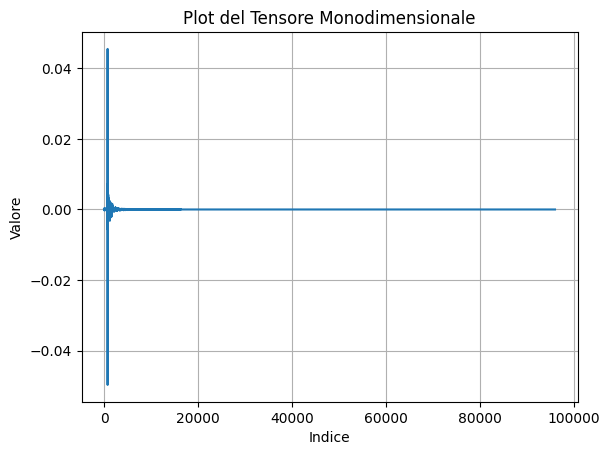

In [11]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp[0]['t_response'].detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()

In [12]:
resp = R_0.render_RIR(L_0)
resp

tensor([-7.7284e-10,  3.6873e-06,  5.5102e-06,  ...,  6.9838e-06,
         6.3781e-06,  6.7109e-06], grad_fn=<AddBackward0>)

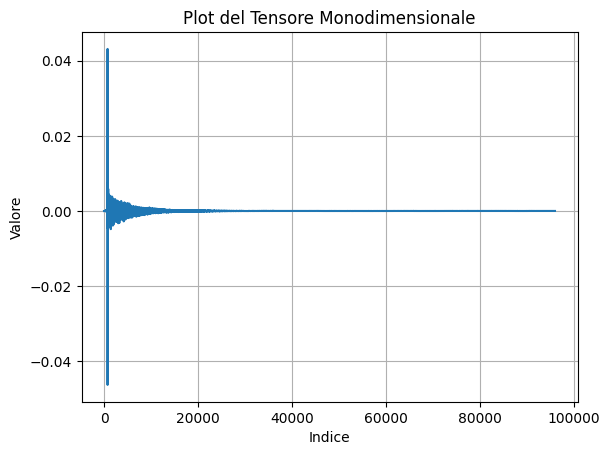

In [13]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp.detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()